# Function definitions

In [1]:
def matrix_multiply(A, B):
    n = len(A)
    p = len(B[0])
    m = len(B)
    result = [[0] * p for _ in range(n)]
    for i in range(n):
        for j in range(p):
            for k in range(m):
                result[i][j] += A[i][k] * B[k][j]
    return result


In [2]:
def matrix_multiply_np(A, B,Reps):
    C=np.dot(A, B)
    for i in range(Reps):
        C=np.dot(A, C)
    return C    


In [3]:
def matrix_multiply_torch(A, B, Reps):
    A_torch = torch.tensor(A).cuda()
    B_torch = torch.tensor(B).cuda()
    C_torch = torch.matmul(A_torch, B_torch)  # Perform the first multiplication on the GPU

    for i in range(Reps):  # Subtract 1 because the first multiplication is already done
        C_torch = torch.matmul(A_torch, C_torch)  # Further multiplications on the GPU

    C = C_torch.cpu().numpy()  # Only move the final result to CPU and convert to NumPy
    return C


# Benchmarking functions level 1

In [4]:
import time
import numpy as np
import torch

# Generate random matrices
n = 512
Reps=10
A = np.random.rand(n, n)
B = np.random.rand(n, n)

#Measure performance of plain Python
start_time = time.time()
result_python = matrix_multiply(A.tolist(), B.tolist())
print("Plain Python time:", time.time() - start_time)

# Measure performance of NumPy
start_time = time.time()
result_np = matrix_multiply_np(A, B,Reps)
print("NumPy time:", time.time() - start_time)

# Measure performance of PyTorch with GPU
start_time = time.time()
result_torch = matrix_multiply_torch(A, B,Reps)
print("PyTorch (GPU) time:", time.time() - start_time)


Plain Python time: 17.680256128311157
NumPy time: 0.01818704605102539
PyTorch (GPU) time: 0.9528861045837402


# Using timeit to properly benchmark functions

PyTorch is using GPU. 

numpy  1 0.0024915655998484
Torch  1 0.01328927280010248
numpy  11 0.02209432840027148
Torch  11 0.037201619199913695
numpy  21 0.0299608369001362
Torch  21 0.05080164940009126
numpy  31 0.0422423419997358
Torch  31 0.07253216630015231
numpy  41 0.056180630200105955
Torch  41 0.09758242280004197
numpy  51 0.07447283170004085
Torch  51 0.11963164570006483
numpy  61 0.07941247039998416
Torch  61 0.13268209779998869
numpy  71 0.08900195530004566
Torch  71 0.15716393100010465
numpy  81 0.11561267269971723
Torch  81 0.17845831689992336
numpy  91 0.12956246130015642
Torch  91 0.198462356500022


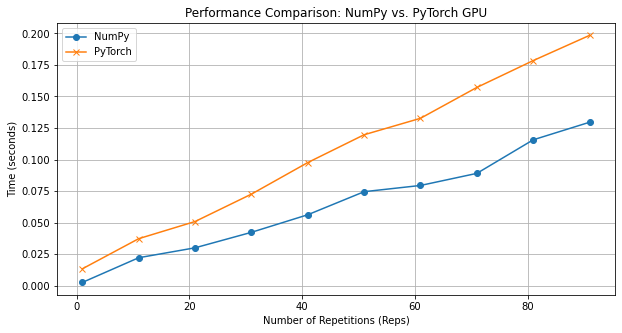

In [5]:
import torch
import timeit
import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    gpu_message = "PyTorch is using GPU. \n"
else:
    gpu_message = "PyTorch is not using GPU. \n"
print(gpu_message)
n = 512
A = np.random.rand(n, n)
B = np.random.rand(n, n)
reps_range = range(1, 101, 10)
numpy_times = []
torch_times = []
number = 10

for Reps in reps_range:
    # Time NumPy
    numpy_time = timeit.timeit('matrix_multiply_np(A, B, Reps)', globals=globals(), number=number)/number
    print('numpy ',Reps, numpy_time)
    numpy_times.append(numpy_time)

    # Time PyTorch
    torch_time = timeit.timeit('matrix_multiply_torch(A, B,  Reps)', globals=globals(), number=number)/number
    print('Torch ',Reps, torch_time)
    torch_times.append(torch_time)

plt.figure(figsize=(10, 5))
plt.plot(reps_range, numpy_times, label='NumPy', marker='o')
plt.plot(reps_range, torch_times, label='PyTorch', marker='x')
plt.xlabel('Number of Repetitions (Reps)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: NumPy vs. PyTorch GPU')
plt.legend()
plt.grid(True)
plt.show()


# Using more GPU intensive calculations

PyTorch is using GPU.

Size: 256x256
NumPy Duration: 0.006131887435913086
Torch GPU Duration: 0.0061070919036865234 

Size: 512x512
NumPy Duration: 0.010320186614990234
Torch GPU Duration: 0.02438187599182129 

Size: 1024x1024
NumPy Duration: 0.02854180335998535
Torch GPU Duration: 0.05834698677062988 

Size: 2048x2048
NumPy Duration: 0.040943145751953125
Torch GPU Duration: 0.05567002296447754 

Size: 4096x4096
NumPy Duration: 0.25838398933410645
Torch GPU Duration: 0.18508148193359375 

Size: 8192x8192
NumPy Duration: 2.5220754146575928
Torch GPU Duration: 0.6757040023803711 



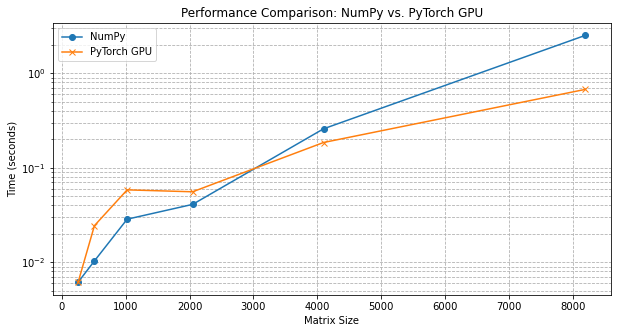

In [6]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt

def multiply_numpy(A, B):
    return np.dot(A, B)

def multiply_torch(A, B):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    A_torch = torch.tensor(A, dtype=torch.float32).to(device)
    B_torch = torch.tensor(B, dtype=torch.float32).to(device)
    return torch.matmul(A_torch, B_torch).cpu()

# Sizes of the matrices to test
sizes = [256, 512, 2**10, 2**11, 2**12, 2**13]
numpy_times = []
torch_times = []
if torch.cuda.is_available():
        print("PyTorch is using GPU.\n")
else:
        print("PyTorch is not using GPU.\n")

for size in sizes:
    A = np.random.rand(size, size).astype(np.float32)
    B = np.random.rand(size, size).astype(np.float32)

    # Time NumPy
    start_time = time.time()
    multiply_numpy(A, B)
    numpy_duration = time.time() - start_time
    numpy_times.append(numpy_duration)

    # Time PyTorch with GPU
    start_time = time.time()
    multiply_torch(A, B)
    torch_duration = time.time() - start_time
    torch_times.append(torch_duration)

    print(f"Size: {size}x{size}")
    print("NumPy Duration:", numpy_duration)
    print("Torch GPU Duration:", torch_duration,'\n')    
    

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(sizes, numpy_times, label='NumPy', marker='o')
plt.plot(sizes, torch_times, label='PyTorch GPU', marker='x')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: NumPy vs. PyTorch GPU')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.legend()
plt.grid(True, which="both", ls="--")  # Enable grid for major and minor ticks
plt.show()


PyTorch is using GPU.

Size: 256x256
NumPy Duration: 0.0004774142002133885
Torch GPU Duration:  0.005781023199961055  

Size: 512x512
NumPy Duration: 0.0013114638000843114
Torch GPU Duration:  0.012920749699696898  

Size: 1024x1024
NumPy Duration: 0.004669805600133259
Torch GPU Duration:  0.013069306100078393  

Size: 2048x2048
NumPy Duration: 0.03457636140010436
Torch GPU Duration:  0.026585510700169835  

Size: 4096x4096
NumPy Duration: 0.29641419140025393
Torch GPU Duration:  0.12642609180002182  

Size: 8192x8192
NumPy Duration: 2.4456769090000305
Torch GPU Duration:  0.6738952809999319  

Size: 16384x16384
NumPy Duration: 22.179941277000033
Torch GPU Duration:  3.6866316062001716  



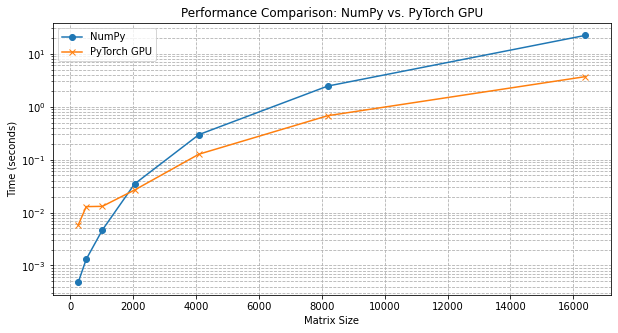

In [13]:
import numpy as np
import torch
import timeit
import matplotlib.pyplot as plt


def multiply_numpy(A, B):
    return np.dot(A, B)

def multiply_torch(A, B):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    A_torch = torch.tensor(A, dtype=torch.float32).to(device)
    B_torch = torch.tensor(B, dtype=torch.float32).to(device)
    return torch.matmul(A_torch, B_torch).cpu()

# Parallel execution using Joblib
def run_in_parallel(A, B):
    result = Parallel(n_jobs=-1)(delayed(multiply_numpy)(A, B) for _ in range(number))
    return result

# Sizes of the matrices to test
sizes = [256, 512, 2**10, 2**11, 2**12,2**13,2**14]
numpy_times = []
torch_times = []
parallel_times = []

number=10
if torch.cuda.is_available():
    print("PyTorch is using GPU.\n")
else:
    print("PyTorch is not using GPU.\n")
    
for size in sizes:
    A = np.random.rand(size, size).astype(np.float32)
    B = np.random.rand(size, size).astype(np.float32)

    # Time NumPy
    numpy_duration = timeit.timeit('multiply_numpy(A, B)', globals=globals(), number=number)/number
    numpy_times.append(numpy_duration)
    print(f"Size: {size}x{size}")
    print("NumPy Duration:", numpy_duration)

    # Time PyTorch with GPU
    torch_duration = timeit.timeit('multiply_torch(A, B)', globals=globals(), number=number)/number
    torch_times.append(torch_duration)
    print("Torch GPU Duration: ", torch_duration,' \n')
        

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(sizes, numpy_times, label='NumPy', marker='o')
plt.plot(sizes, torch_times, label='PyTorch GPU', marker='x')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: NumPy vs. PyTorch GPU')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.legend()
plt.grid(True, which="both", ls="--")  # Enable grid for major and minor ticks
plt.show()


In [14]:
import numpy as np
import torch
from PIL import Image
import timeit

# Example image loading and conversion to numpy
image = Image.open('Kinkade.jpg').convert('RGB')  # Ensure image is in RGB
image_np = np.array(image).astype(np.float32)  # Convert to float for better handling in PyTorch
image_torch = torch.tensor(image_np.transpose(2, 0, 1)).unsqueeze(0).to('cuda')  # Convert to Tensor and move to GPU

# Define the target size as a tuple (width, height)
size = (512*20, 512*20)  # Define the size as a tuple

def numpy_resize(image_np, size):
    return np.array(Image.fromarray(image_np.astype(np.uint8)).resize(size))

def torch_resize(image_torch, size):
    # size needs to be (height, width) for PyTorch, reverse the tuple
    torch_size = (size[1], size[0])
    return torch.nn.functional.interpolate(image_torch, size=torch_size, mode='bilinear', align_corners=False).cpu()

# Timing the functions using timeit
number = 10  # Number of iterations for timing

# Time NumPy
numpy_time = timeit.timeit('numpy_resize(image_np, size)', globals=globals(), number=number) / number

# Time PyTorch
torch_time = timeit.timeit('torch_resize(image_torch, size)', globals=globals(), number=number) / number

print("NumPy Duration:", numpy_time)
print("Torch GPU Duration:", torch_time)


NumPy Duration: 1.3758800340001471
Torch GPU Duration: 0.5988728815998912


In [15]:
# Creating a large array and summing it
import timeit
import numpy as np
import torch
large_data = np.random.rand(10**8)  # 10 million elements


def sum_numpy(data):
    return np.sum(data)

def sum_torch(data):
    tensor = torch.tensor(data).cuda()
    return torch.sum(tensor).cpu()

number=10
# Timing the sum operations
numpy_time = timeit.timeit('sum_numpy(large_data)', globals=globals(), number=number) / number


torch_time = timeit.timeit('sum_torch(large_data)', globals=globals(), number=number) / number


print("NumPy time:", numpy_time)
print("Torch time:", torch_time)


NumPy time: 0.0506819596997957
Torch time: 0.3619863562998944
